In [1]:
## Import the required libraries
import numpy as np
import pandas as pd

## import matplot library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing comcast dataset
df_comcast = pd.read_csv('C:\\Users\\manok\\OneDrive\\Desktop\\Comcast\\Comcast_telecom_complaints_data.csv')

In [3]:
#View the first five observations of the dataset
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
## Shape of the dataset
df_comcast.shape

(2224, 11)

In [5]:
## Combining the data and time column
df_comcast["Report_index"] = df_comcast["Date"] + " " + df_comcast["Time"]

In [6]:
df_comcast["Report_index"]

0        22-04-15 3:53:50 PM
1       04-08-15 10:22:56 AM
2        18-04-15 9:55:47 AM
3       05-07-15 11:59:35 AM
4        26-05-15 1:25:26 PM
                ...         
2219     04-02-15 9:13:18 AM
2220     06-02-15 1:24:39 PM
2221     06-09-15 5:28:41 PM
2222    23-06-15 11:13:30 PM
2223    24-06-15 10:28:33 PM
Name: Report_index, Length: 2224, dtype: object

In [7]:
## Converting the Date_month_year to the datetime format
df_comcast["Date_month_year"] = pd.to_datetime(df_comcast["Date_month_year"])

In [8]:
df_comcast["Date_month_year"].head()

0   2015-04-22
1   2015-08-04
2   2015-04-18
3   2015-07-05
4   2015-05-26
Name: Date_month_year, dtype: datetime64[ns]

In [9]:
## Replacing the Index part with 'Report_index'
df_comcast = df_comcast.set_index(df_comcast["Report_index"])

In [10]:
df_comcast.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Report_index
Report_index,,,,,,,,,,,,
22-04-15 3:53:50 PM,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-04-15 3:53:50 PM
04-08-15 10:22:56 AM,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-08-15 10:22:56 AM
18-04-15 9:55:47 AM,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-04-15 9:55:47 AM


In [11]:
## Get the No of complaints daywise
No_of_complaints_daywise = df_comcast["Date_month_year"].value_counts()

In [12]:
No_of_complaints_daywise

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-17      7
2015-12-05      7
2015-05-04      6
2015-11-04      5
2015-03-05      5
Name: Date_month_year, Length: 91, dtype: int64

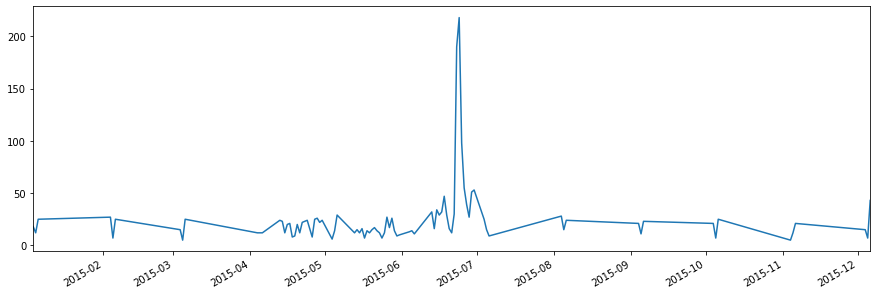

In [13]:
## Month wise plot
df_comcast_daywise_count = df_comcast["Date_month_year"].value_counts()
df_comcast_daywise_count.plot(figsize=(15,5))

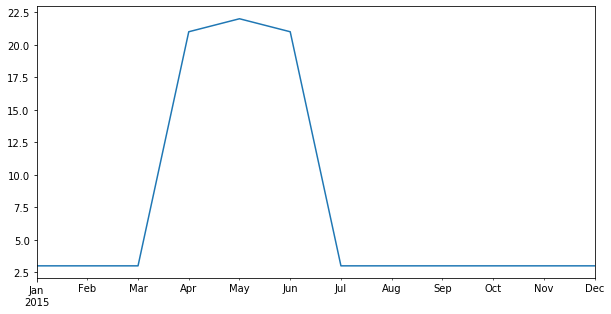

In [14]:
df_comcast_Monthwise_count = No_of_complaints_daywise.groupby(pd.Grouper(freq="M")).size()
df_comcast_Monthwise_count.plot(figsize=(10,5))

In [15]:
df_com = df_comcast.sort_values(by = 'Date_month_year',ascending=False)

In [16]:
df_com.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Report_index
Report_index,,,,,,,,,,,,
06-12-15 5:28:32 PM,337985,HBO shouldn't have a load time,06-12-15,2015-12-06,5:28:32 PM,Customer Care Call,Indianapolis,Indiana,46268,Solved,No,06-12-15 5:28:32 PM
06-12-15 7:31:37 PM,338283,monthly data caps,06-12-15,2015-12-06,7:31:37 PM,Customer Care Call,Gadsden,Alabama,35901,Solved,No,06-12-15 7:31:37 PM
06-12-15 11:52:11 PM,338606,Internet connection outage,06-12-15,2015-12-06,11:52:11 PM,Customer Care Call,Clarkston,Michigan,48346,Solved,No,06-12-15 11:52:11 PM


In [17]:
## Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
## -  Create a new categorical variable with value as Open and Closed. 
##      Open & Pending  --> OPEN
##      Closed & Solved --> CLOSED
## -  Provide state wise status of complaints in a stacked bar chart. 
##      Use the categorized variable from Q3. 
##      Provide insights on:

In [18]:
df_comcast.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [19]:
df_comcast["NewStatus"] = ["Open" if Status== "Open" or 
                                     Status== "Pending"
                                  else "Closed" 
                        for Status in df_comcast["Status"]]

In [20]:
df_comcast.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Report_index,NewStatus
Report_index,,,,,,,,,,,,,
22-04-15 3:53:50 PM,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-04-15 3:53:50 PM,Closed
04-08-15 10:22:56 AM,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-08-15 10:22:56 AM,Closed
18-04-15 9:55:47 AM,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-04-15 9:55:47 AM,Closed


In [21]:
df_comcast.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Count"}, axis=1).head()

,Count
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


In [22]:
Status_complaints = df_comcast.groupby(["State","NewStatus"]).size().unstack()

In [23]:
Status_complaints = Status_complaints.fillna(0)
Status_complaints.head(3)

NewStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0


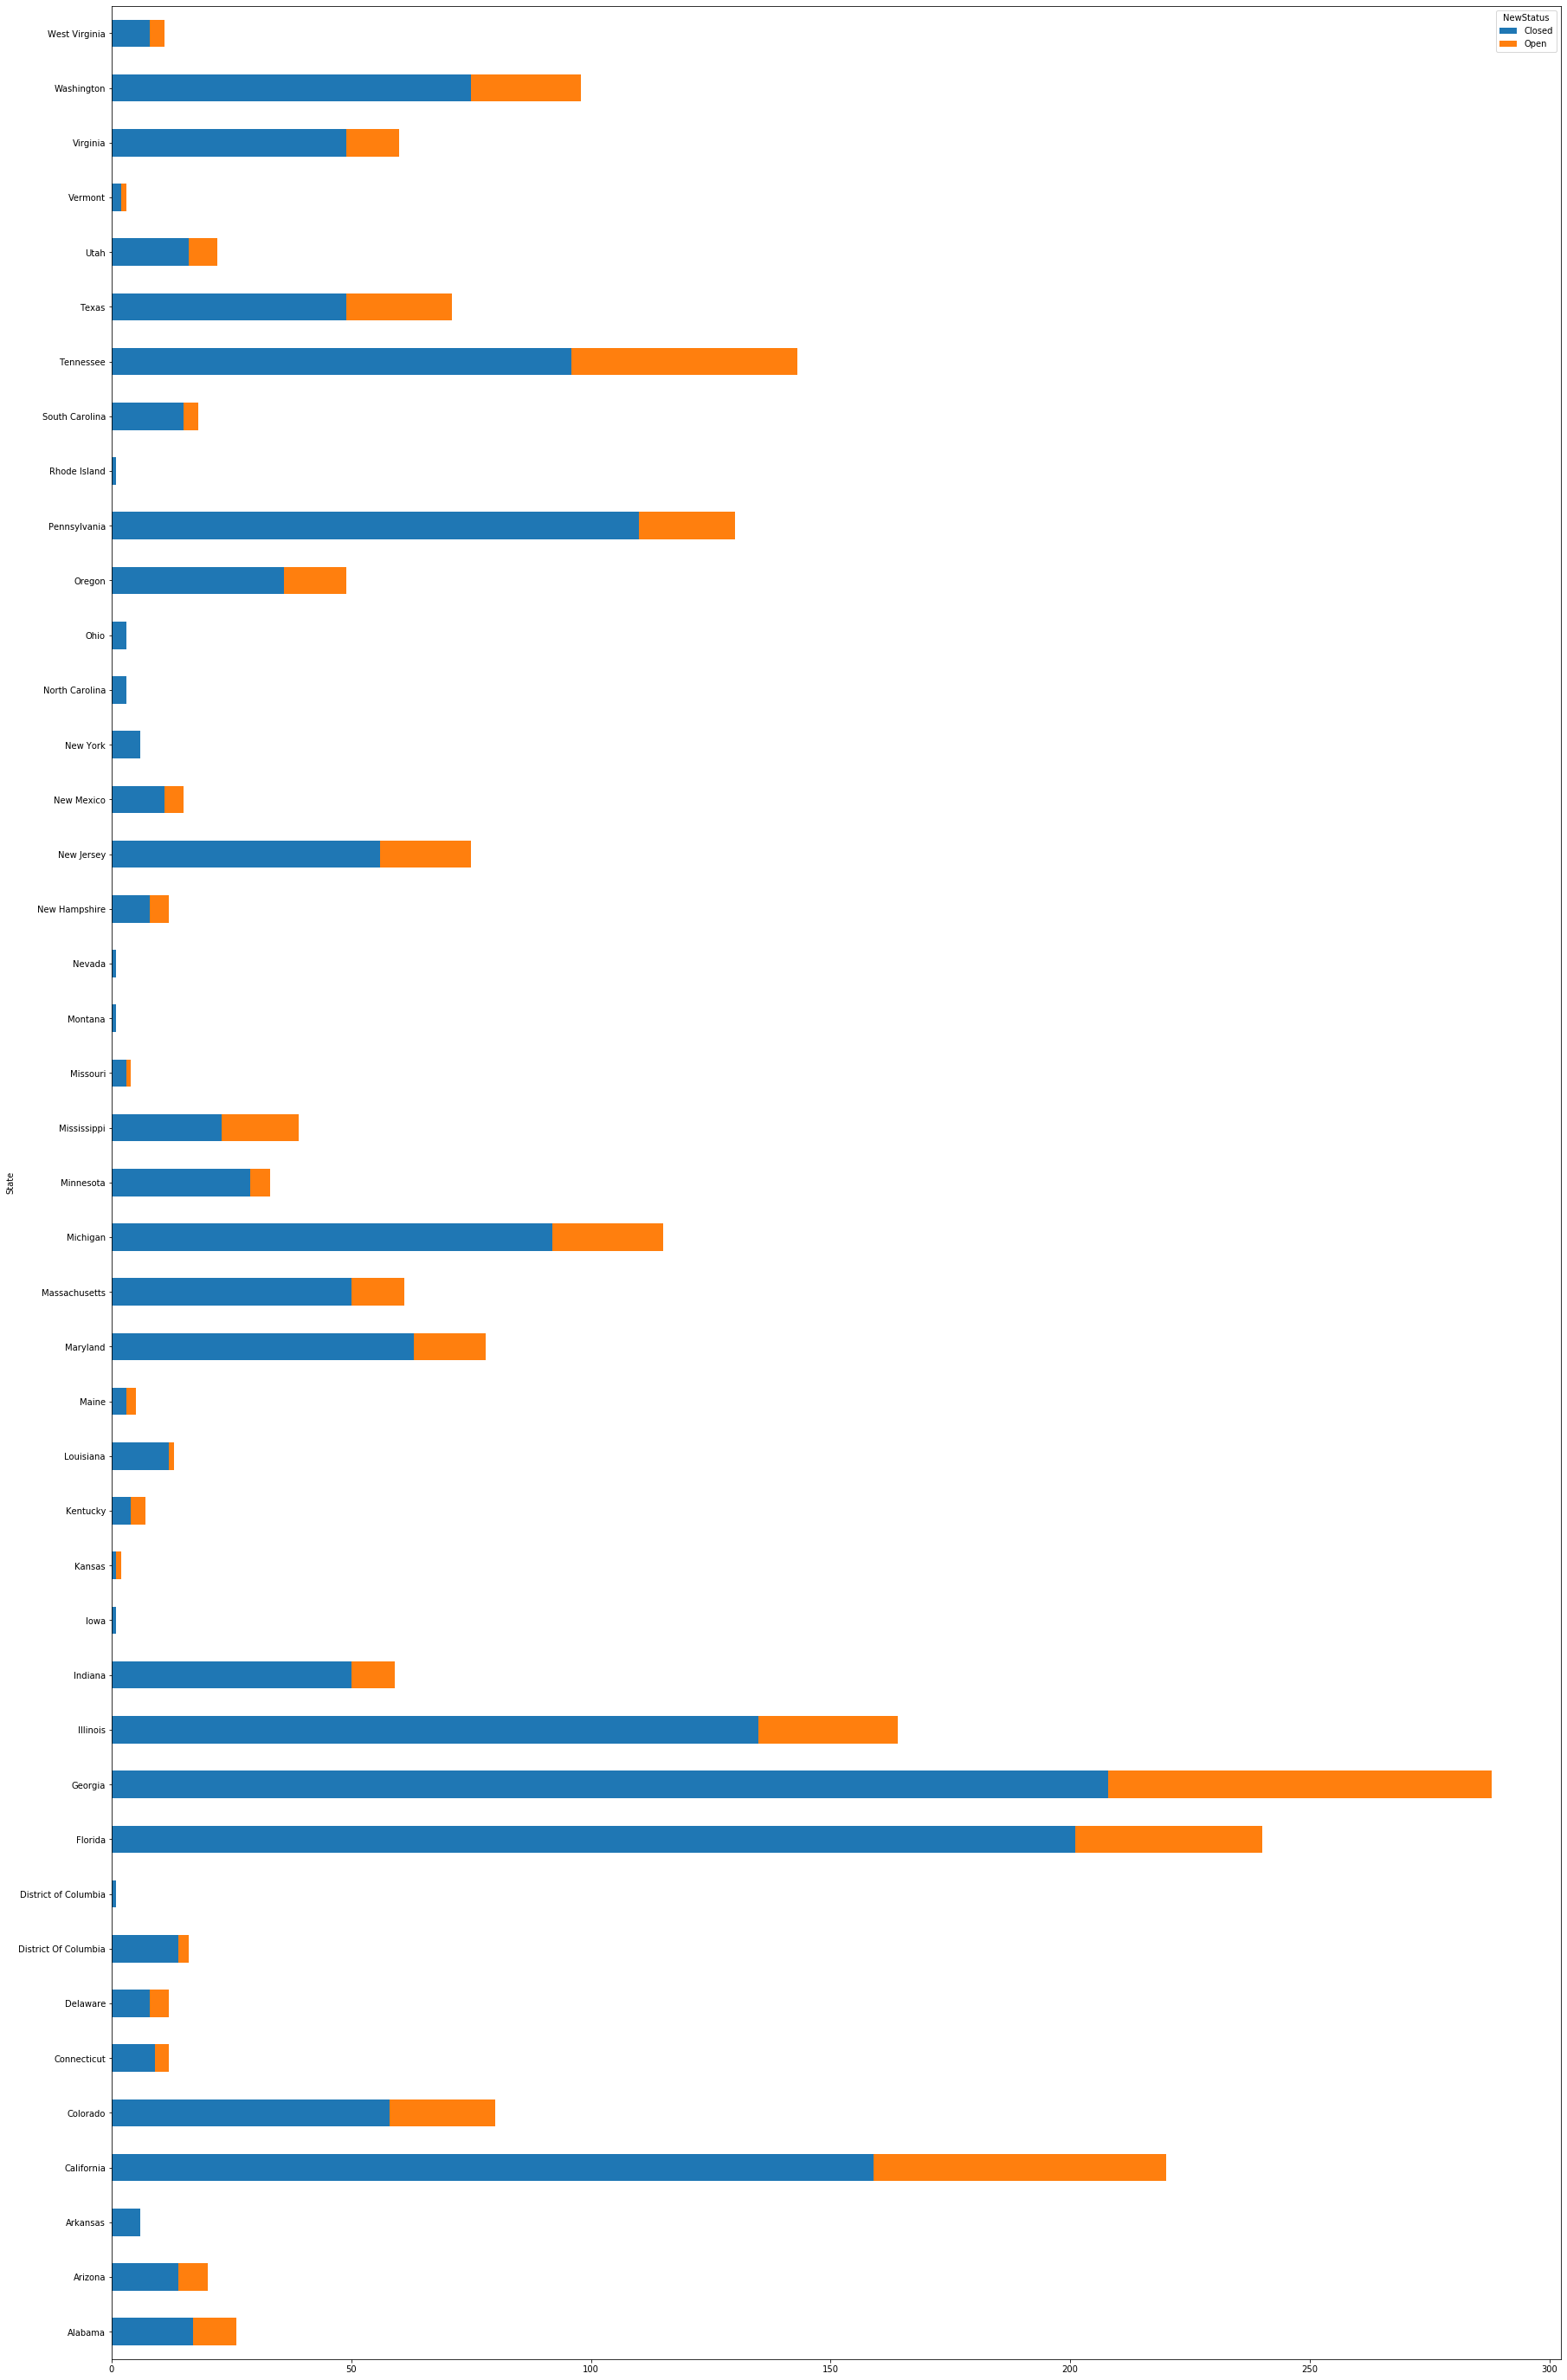

In [24]:
Status_complaints.plot(kind="barh", figsize=(30,50), stacked=True)

In [25]:
### State has the maximum complaints

In [26]:
state_complaints = df_comcast.groupby(["State"]).size()
state_complaints.head()

State
Alabama        26
Arizona        20
Arkansas        6
California    220
Colorado       80
dtype: int64

In [27]:
## State having Highest complaint 
state_complaints_sort = state_complaints.sort_values(ascending=False)
state_complaints_sort.head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [28]:
## View the state complaints in dataframe format
df_state_complaints_sort1 = state_complaints_sort.to_frame()
df_state_complaints_sort1
## rename the column '0' as the count 
State_max_complaints = df_state_complaints_sort1.rename({0: "Count"}, axis = 1)
State_max_complaints.head()

,Count
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


In [29]:
## No of complaints that are closed and opened status
Df_comcast_status = df_comcast.groupby(["State","NewStatus"]).size().unstack().fillna(0)
Df_comcast_status.sort_values(by ='Closed',ascending=False).head()

NewStatus,Closed,Open
State,,
Georgia,208.0,80.0
Florida,201.0,39.0
California,159.0,61.0
Illinois,135.0,29.0
Pennsylvania,110.0,20.0


In [30]:
## Total closed complaints
Total_closed = Df_comcast_status['Closed'].sum()
Total_closed

1707.0

In [31]:
## Total Open complaints
Total_open = Df_comcast_status['Open'].sum()
Total_open

517.0

In [32]:
## Total complaints of the individual state
Df_comcast_status["Total complainints"] = Df_comcast_status["Closed"] + Df_comcast_status["Open"]

In [33]:
Total_complaints = Df_comcast_status["Total complainints"].sum()
Total_complaints

2224.0

In [34]:
## Individual State close percentage of a state
Df_comcast_status["Closed%"] = ((Df_comcast_status["Closed"]/Total_closed)*100)

In [35]:
## Individual State open percentage of a state
Df_comcast_status["Open%"] = ((Df_comcast_status["Open"]/Total_open)*100)

In [38]:
## Statwise percentage of complaints
Df_comcast_status["Statwise_Perc_compl"] = ((Df_comcast_status["Total complainints"]/Total_complaints)*100)

In [39]:
Statwiste_comcast_status = Df_comcast_status.sort_values(by ='Closed',ascending=False)
Statwiste_comcast_status.head(5)

NewStatus,Closed,Open,Total complainints,Closed%,Open%,Statwise_Perc_compl
State,,,,,,
Georgia,208.0,80.0,288.0,12.185120,15.473888,12.949640
Florida,201.0,39.0,240.0,11.775044,7.543520,10.791367
California,159.0,61.0,220.0,9.314587,11.798839,9.892086
Illinois,135.0,29.0,164.0,7.908612,5.609284,7.374101
Pennsylvania,110.0,20.0,130.0,6.444054,3.868472,5.845324


In [40]:
df_comcast_received_via = df_comcast.filter(["Received Via","State","Status"])

In [41]:
df_comcast_received_via.head(10)

,Received Via,State,Status
Report_index,,,
22-04-15 3:53:50 PM,Customer Care Call,Maryland,Closed
04-08-15 10:22:56 AM,Internet,Georgia,Closed
18-04-15 9:55:47 AM,Internet,Georgia,Closed
05-07-15 11:59:35 AM,Internet,Georgia,Open
26-05-15 1:25:26 PM,Internet,Georgia,Solved
06-12-15 9:59:40 PM,Internet,Georgia,Solved
24-06-15 10:13:55 AM,Customer Care Call,Georgia,Pending
23-06-15 6:56:14 PM,Internet,Michigan,Solved
06-01-15 11:46:30 PM,Customer Care Call,California,Closed


In [42]:
df_comcast_received_via["NewStatus"] = ["Open" if Status== "Open" or 
                                     Status== "Pending"
                                  else "Closed" 
                        for Status in df_comcast["Status"]]

In [43]:
df_comcast_received_via

,Received Via,State,Status,NewStatus
Report_index,,,,
22-04-15 3:53:50 PM,Customer Care Call,Maryland,Closed,Closed
04-08-15 10:22:56 AM,Internet,Georgia,Closed,Closed
18-04-15 9:55:47 AM,Internet,Georgia,Closed,Closed
05-07-15 11:59:35 AM,Internet,Georgia,Open,Open
26-05-15 1:25:26 PM,Internet,Georgia,Solved,Closed
...,...,...,...,...
04-02-15 9:13:18 AM,Customer Care Call,Florida,Closed,Closed
06-02-15 1:24:39 PM,Customer Care Call,Michigan,Solved,Closed
06-09-15 5:28:41 PM,Internet,Michigan,Solved,Closed


In [44]:
## Complaints received through the internet
df_comcast_received_via_int = (df_comcast_received_via ["Received Via"] == 'Internet')

In [45]:
Int = df_comcast_received_via[df_comcast_received_via_int]

In [46]:
Int1 = Int.groupby(["Received Via","NewStatus"]).size().unstack()

In [47]:
Internet_Closed = Int1['Closed'].sum()
Internet_Closed

843

In [48]:
Internet_Open = Int1['Open'].sum()
Internet_Open

262

In [49]:
Total_Internet_complaints = Internet_Closed + Internet_Open
Total_Internet_complaints

1105

In [50]:
## Complaints received through the 'customer care calls(CCC)'
df_comcast_received_via_CCC = (df_comcast_received_via ["Received Via"] == 'Customer Care Call')

In [51]:
CCC = df_comcast_received_via[df_comcast_received_via_CCC]

In [52]:
CCC1 = CCC.groupby(["Received Via","NewStatus"]).size().unstack()

In [53]:
CCC_Closed = CCC1['Closed'].sum()
CCC_Closed

864

In [54]:
CCC_Open = CCC1['Open'].sum()
CCC_Open

255

In [55]:
Total_CCC_complaints = CCC_Closed + CCC_Open
Total_CCC_complaints

1119

In [56]:
## Percentage of complaints resolved till date, which were received through the Internet and customer care calls.
Total_Int_CCC = Total_Internet_complaints + Total_CCC_complaints
Total_Int_CCC

2224

In [57]:
## Percentage of complaints resolved till date(Internet and customer care calls)
Complaints_Int_CCC_Resolved = Internet_Closed + CCC_Closed
Complaints_Int_CCC_Res_Per = ((Complaints_Int_CCC_Resolved/Total_Int_CCC)*100)
Complaints_Int_CCC_Res_Per

76.75359712230215